### Filtragem Espacial - Derivada

Como imagens sao conjuntos de pixels, o  $\delta$ x = 1, da derivada :

\begin{equation}
  \frac{df}{dx} \approx f(x+1) - f(x)
\end{equation}

Filtr derivada:
\begin{equation}
  w : |-1 | 1 |
\end{equation}

Variação contêm bastante informações em imagens, por isso ao derivar uma imagem se obtêm a variação dela.

Para imagens, nas linhas da imagem temos:
\begin{equation}
  w : |-1 | 1 | = \frac{df}{dx}
\end{equation}
Para coluna basta colocar o filtro na vertical.

### Problema

Derivadas sao muito sensiveis a ruidos, pois eles causam variações na imagem/sinal. Por isso, suaviza-se o sinal/imagem para eliminar as variações dos ruídos e manter apenas a variação da imagem em si.

Text(0, 0.5, '$f(x) =x²$')

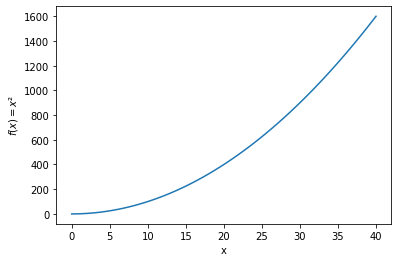

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 40, 100)
fx = x**2
plt.plot(x, fx)

plt.xlabel('x')
plt.ylabel('$f(x) =x²$')

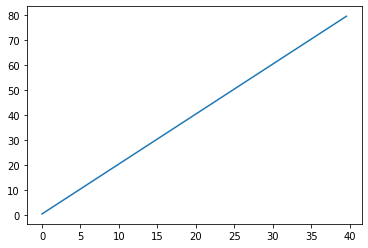

In [18]:
dfx = np.zeros(len(fx)-1)
dx = x[1] - x[0] # delta x

for i in range(len(fx)-1):
  dfx[i] = (fx[i+1]-fx[i]) / dx
  
plt.plot(x[:-1], dfx)

In [19]:
# Derivada com notação do numpy

dfx = (fx[1:] - fx[:-1]) / dx
dfx = np.diff(fx) / dx

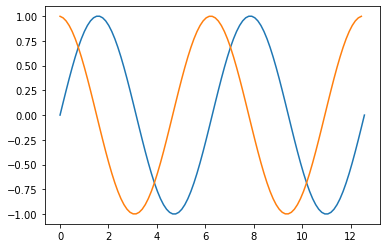

In [20]:
x = np.linspace(0, 4*np.pi, 101)

dx = x[1] - x[0]

fx = np.sin(x)
dfx = np.diff(fx) / dx

plt.plot(x, fx, label='fx')
plt.plot(x[:-1], dfx, label='dfx')

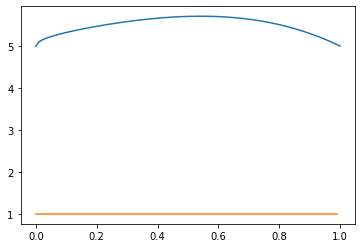

In [21]:
x = np.linspace(0, 1, 100)

fx = 5 + x**2 + np.sqrt(x) - 2 * x ** 3
dx = x[1] - x[0]

dfx = np.diff(x) / dx
plt.plot(x, fx)
plt.plot(x[:-1], dfx)

Text(0.5, 1.0, 'Dx vertical')

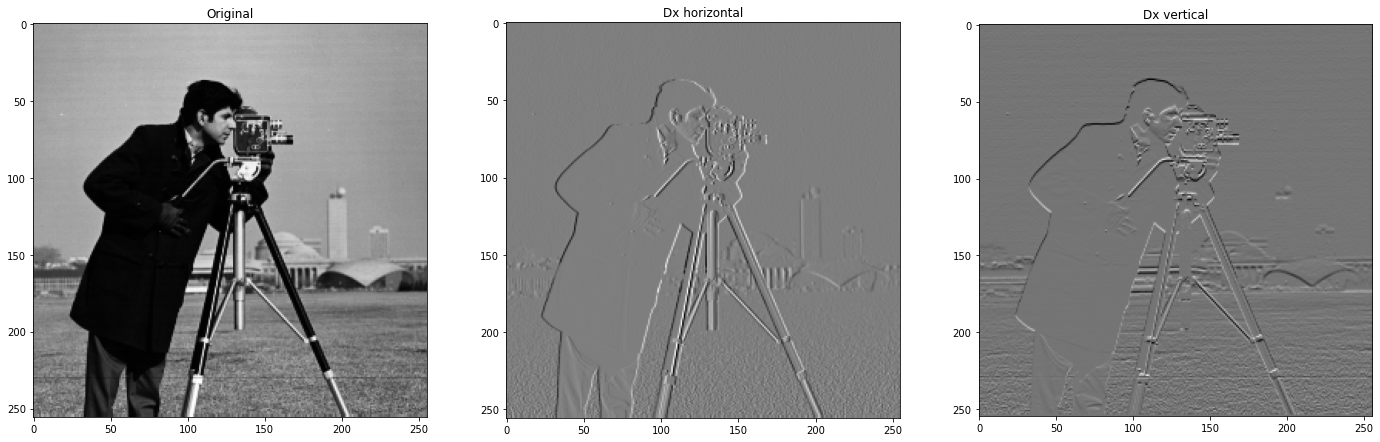

In [22]:
img = plt.imread('Imgs/cameraman.tiff')

# Converter a imagem para inteiro pois a derivada pode ser negativa
img = img.astype(int)

num_rows, num_cols = img.shape
img_dx_horizontal = np.zeros((num_rows, num_cols-1))

# Derivada horizontal
for row in range(num_rows):
  for col in range(num_cols-1):
    img_dx_horizontal[row, col] = img[row, col+1] - img[row, col]
    
    
# Derivada vertical
img_dy_vertical = np.zeros((num_rows-1, num_cols))
for row in range(num_rows-1):
  for col in range(num_cols):
    img_dy_vertical[row, col] = img[row+1, col] - img[row, col]
    
plt.figure(figsize=[24, 24])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_horizontal, 'gray')
plt.title('Dx horizontal')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_vertical, 'gray')
plt.title('Dx vertical')

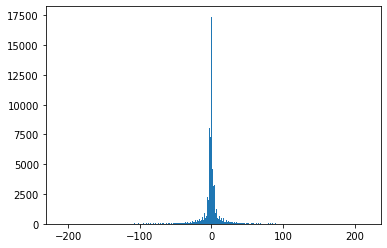

In [23]:
_ = plt.hist(img_dx_horizontal.flatten(), 300)

In [24]:
# Com numpy
#[todas as linhas, da coluna 1 pra frente] - [todas as linhas, todas as colunas menos a última]
# img_dx = img[:, 1:] - img[:, :-1]
# ou
# axis = 1 -> fazer a operacao ao longo da 2dimensao = linhas
# img_dx = np.diff(img, axis = 1 )

# img_dy = img[1:] - img[:-1]
# img_dy = np.diff(img, axis = 0)

### Gradiente
O filtro do gradiente sempre aponta para a direção de maior crescimento da função.

\begin{equation}
  g(x,y) = (\frac{df}{dx}, \frac{df}{dy})
\end{equation}

### Magnitude do gradiente

Indica o quão rápido é a variação de cada ponto na imagem.

\begin{equation}
  M(x,y) = \sqrt{(\frac{df}{dx})^2 + (\frac{df}{dy})^2}
\end{equation}


Text(0.5, 1.0, 'Magnitude do gradiente')

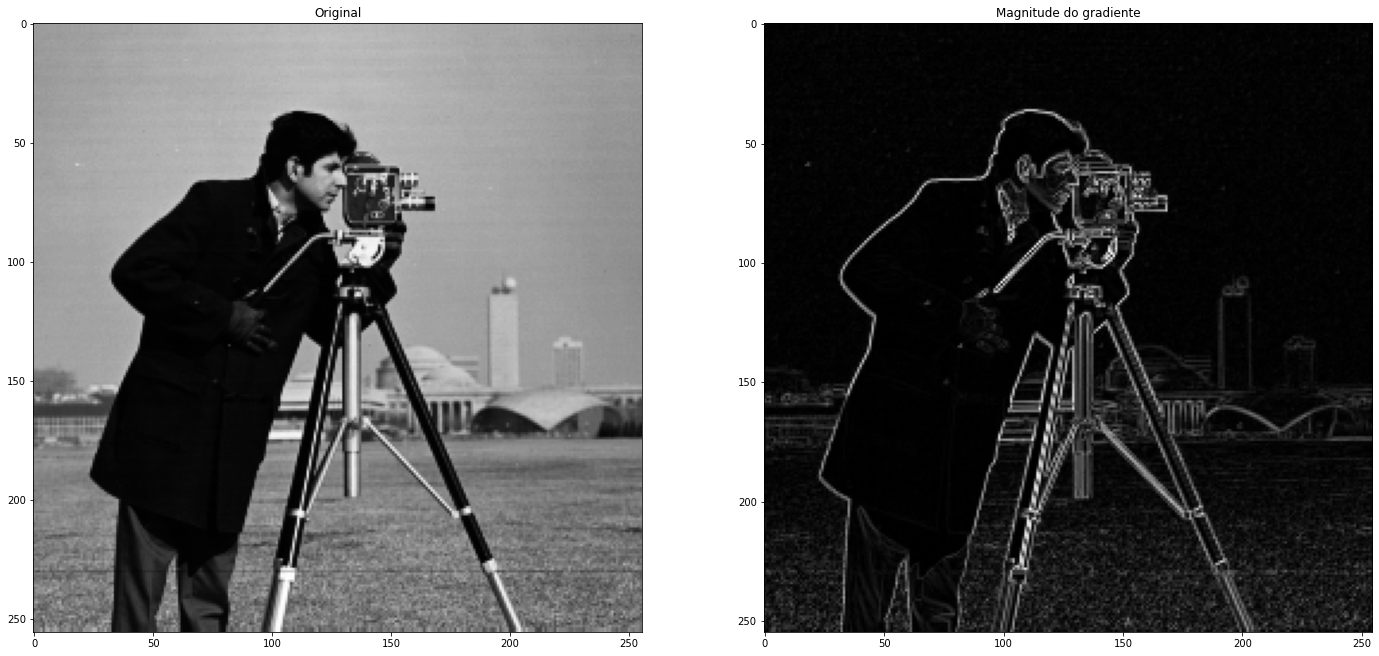

In [26]:
img_mag_grad = np.zeros((num_rows-1, num_cols-1))

for row in range(num_rows - 1):
  for col in range(num_cols - 1):
    img_mag_grad[row, col] = np.sqrt(img_dx_horizontal[row,col]**2 +
                                     img_dy_vertical[row, col]**2)
    
plt.figure(figsize=[24, 24])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_mag_grad, 'gray')
plt.title('Magnitude do gradiente')

Text(0.5, 1.0, 'Dy conv')

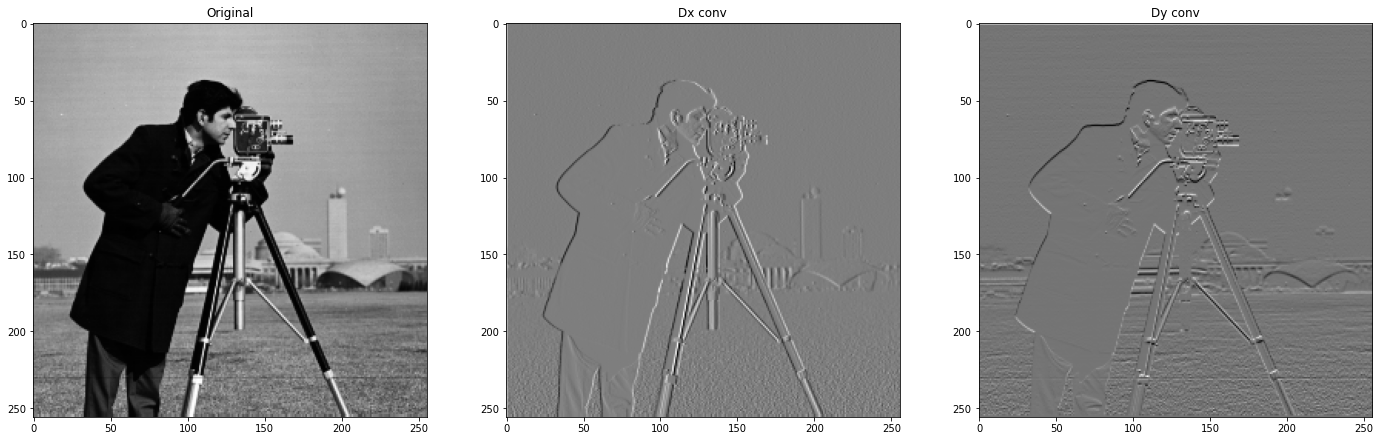

In [27]:
# Derivada com filtros
from scipy.signal import convolve

wx = np.array([[1, -1]])
wy = np.array([[1], 
               [-1]])

# usar mode = 'same' para a saida nao produzir uma imagem maior
img_dx_conv = convolve(img, wx, mode = 'same')
img_dy_conv = convolve(img, wy, mode = 'same')


plt.figure(figsize=[24, 24])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv, 'gray')
plt.title('Dx conv')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv, 'gray')
plt.title('Dy conv')

Text(0.5, 1.0, 'Sobel_y conv')

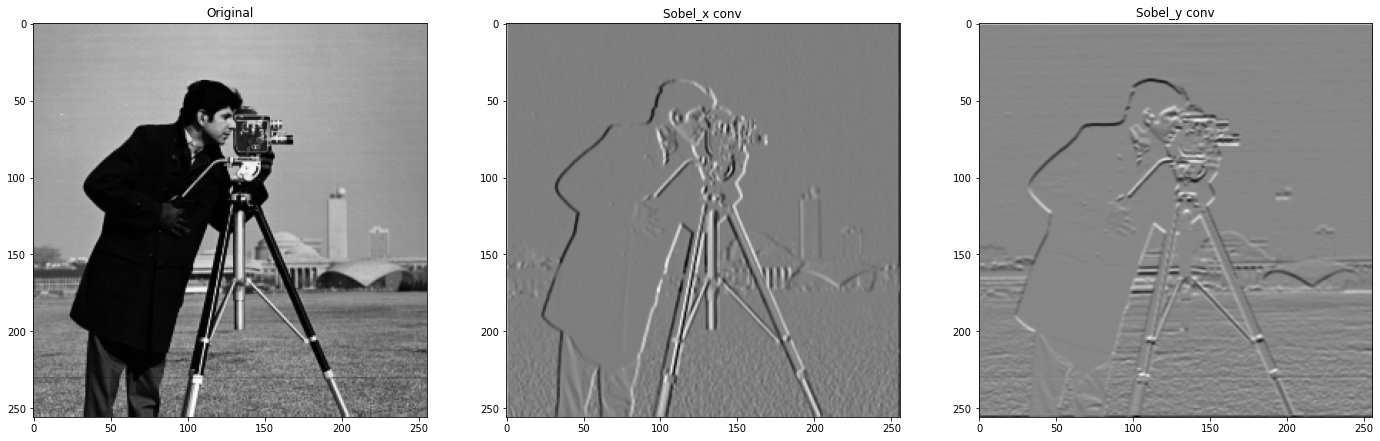

In [29]:
# Derivada com filtros
from scipy.signal import convolve

sobel_x = np.array([
  [1, 0, -1],
  [2, 0, -2],
  [1, 0, -1]
])
sobel_y = sobel_x.transpose()

# usar mode = 'same' para a saida nao produzir uma imagem maior
img_sobel_x_conv = convolve(img, sobel_x, mode = 'same')
img_sobel_y_conv = convolve(img, sobel_y, mode = 'same')


plt.figure(figsize=[24, 24])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_sobel_x_conv, 'gray')
plt.title('Sobel_x conv')
plt.subplot(1, 3, 3)
plt.imshow(img_sobel_y_conv, 'gray')
plt.title('Sobel_y conv')

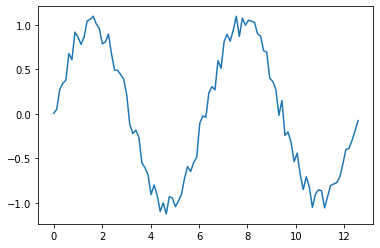

In [30]:
from scipy.signal import correlate

def gaussian_filter_1d(s):
  sigma = s / 6
  
  x = np.linspace(-3*sigma, 3*sigma, s)
  y = np.exp(-x**2 / (2*sigma**2))
  y = y / np.sum(y)
  
  return y

noise_amount = 0.3
x = np.linspace(0, 4 * np.pi, 101)
fx = np.sin(x) + noise_amount * (np.random.rand(len(x)) - 0.5)

plt.plot(x, fx)

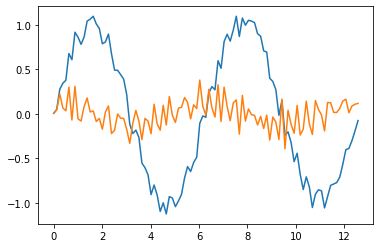

In [32]:
fil_der = np.array([1, -1])
dfx = convolve(fx, fil_der, mode = 'same')
plt.plot(x, fx)
plt.plot(x, dfx)

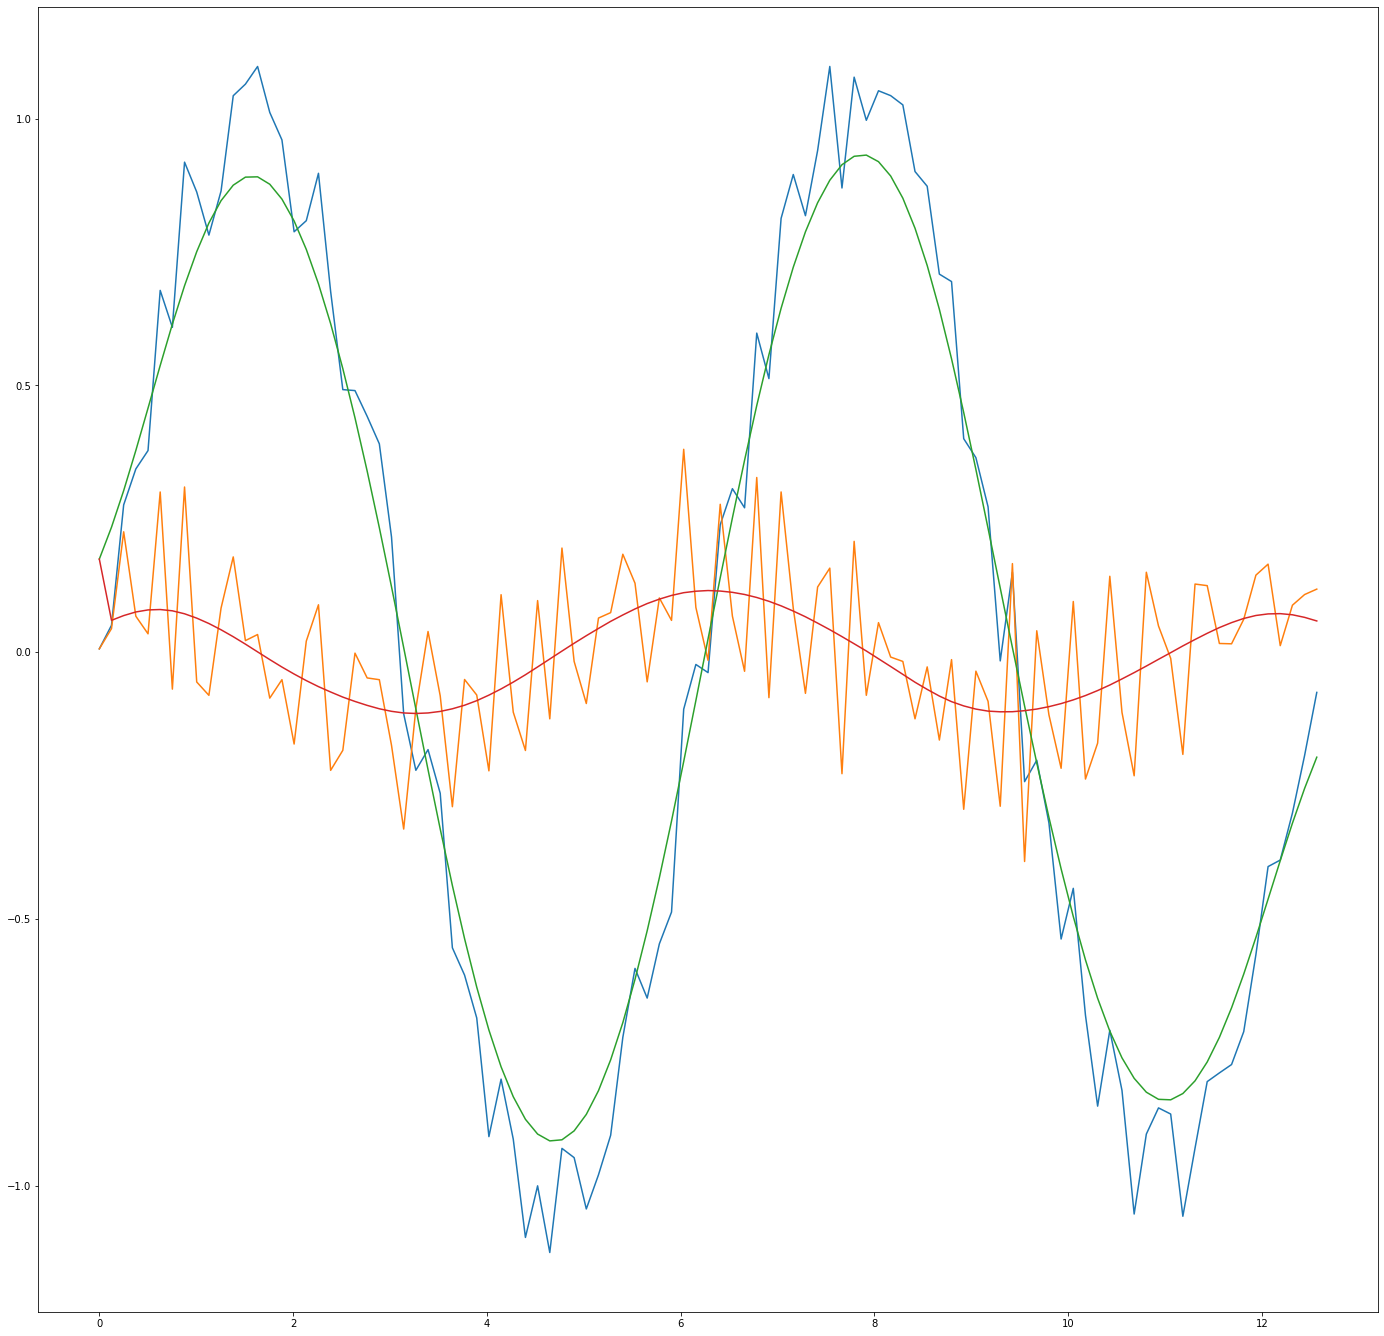

In [36]:
fil_suav = gaussian_filter_1d(25)
fx_suav = convolve(fx, fil_suav, mode = 'same')
dfx_suav = convolve(fx_suav, fil_der, mode = 'same')

plt.figure(figsize=[24, 24])
plt.plot(x, fx)
plt.plot(x, dfx)
plt.plot(x, fx_suav)
plt.plot(x, dfx_suav)

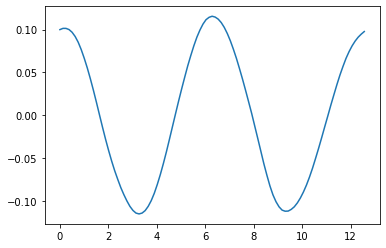

In [38]:
pad = 13
fx_pad = np.pad(fx, pad, mode = 'wrap')

fx_suav = convolve(fx_pad, fil_suav, mode='same')
dfx_suav = convolve(fx_suav, fil_der, mode='same')
dfx_suav = dfx_suav[pad:-pad]
plt.plot(x, dfx_suav)

### Segunda Derivada 



Text(0.5, 1.0, 'Filtro laplaciano')

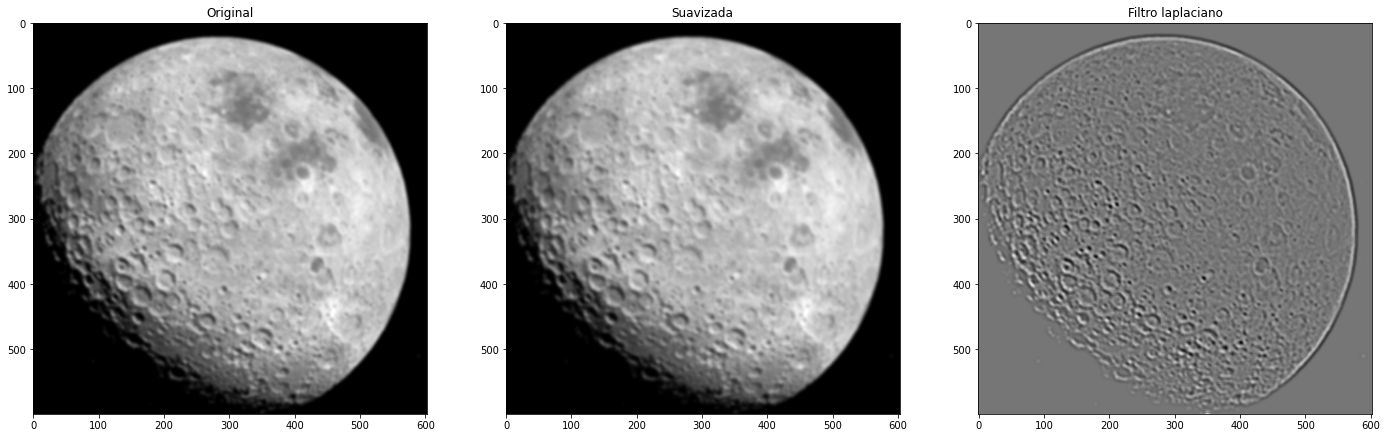

In [41]:
import scipy.ndimage as ndi

img = plt.imread('Imgs/moon.tiff')
img = img.astype(float)

filtro_lap = np.array([
  [0, -1, 0],
  [-1, 4, -1],
  [0, -1, 0]
])

img_smooth = ndi.gaussian_filter(img, sigma = 1)
img_lap = convolve(img_smooth, filtro_lap, mode='same')


plt.figure(figsize=[24, 24])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_smooth, 'gray')
plt.title('Suavizada')
plt.subplot(1, 3, 3)
plt.imshow(img_lap, 'gray')
plt.title('Filtro laplaciano')

Text(0.5, 1.0, 'Improved')

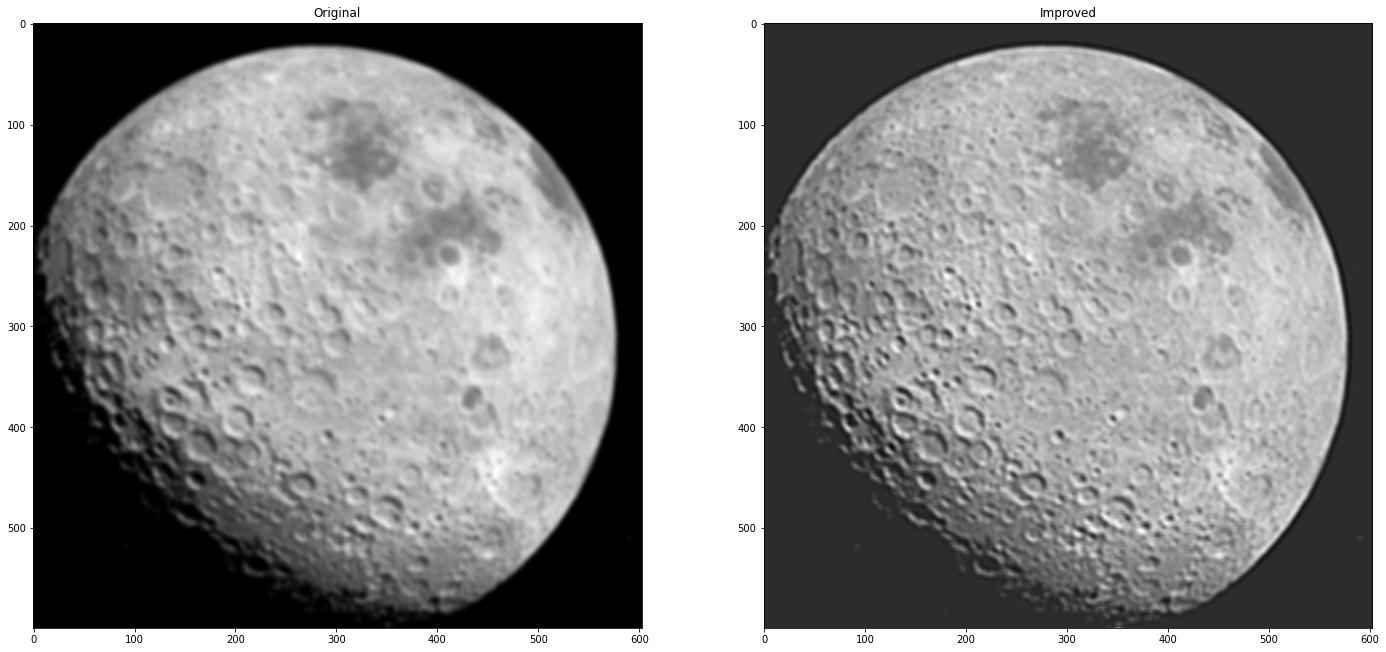

In [52]:
c = 5
img_improve = img + c*img_lap


plt.figure(figsize=[24, 24])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_improve, 'gray')
plt.title('Improved')

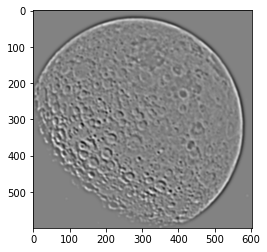

In [48]:
img_smooth = ndi.gaussian_filter(img, sigma = 5)
img_bord = img - img_smooth
plt.imshow(img_bord, 'gray')

Text(0.5, 1.0, 'Improved')

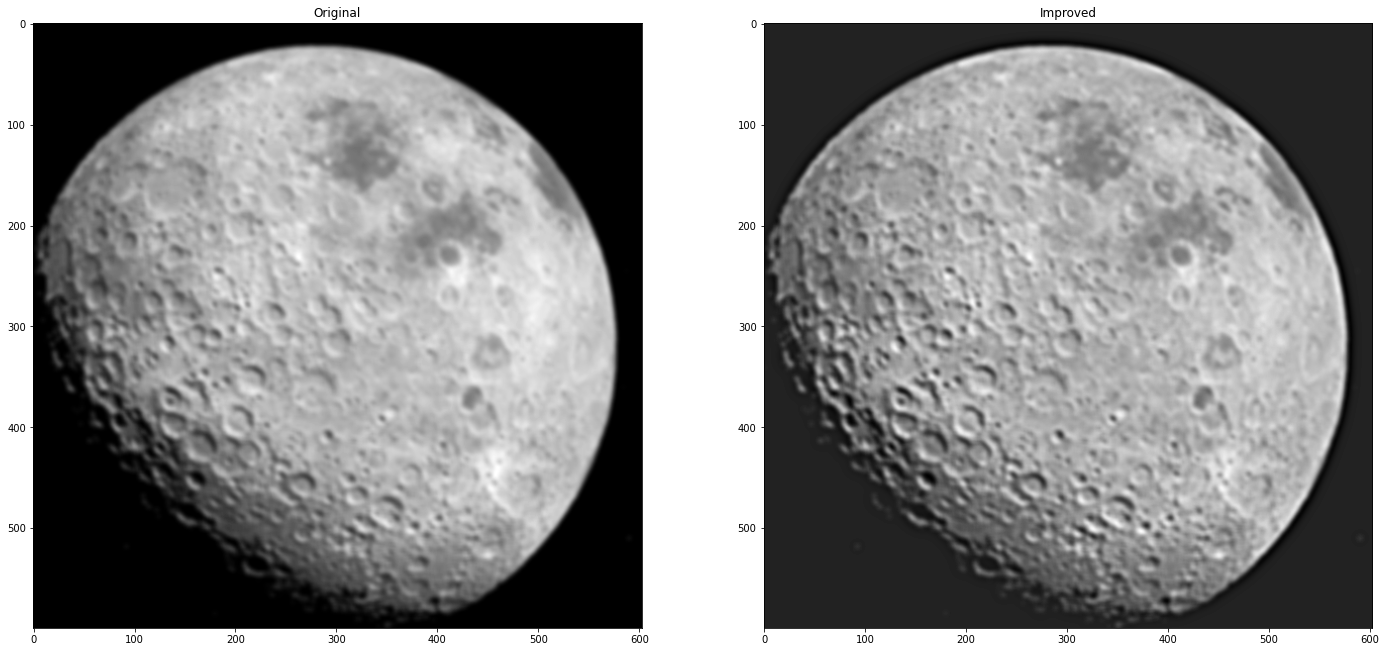

In [51]:
c = 1
img_improve = img + c*img_bord


plt.figure(figsize=[24, 24])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_improve, 'gray')
plt.title('Improved')

In [53]:
img = plt.imread('Imgs/flower.tiff')
print(img.shape)
print(np.min(img), np.max(img))

(755, 800, 4)
0 255


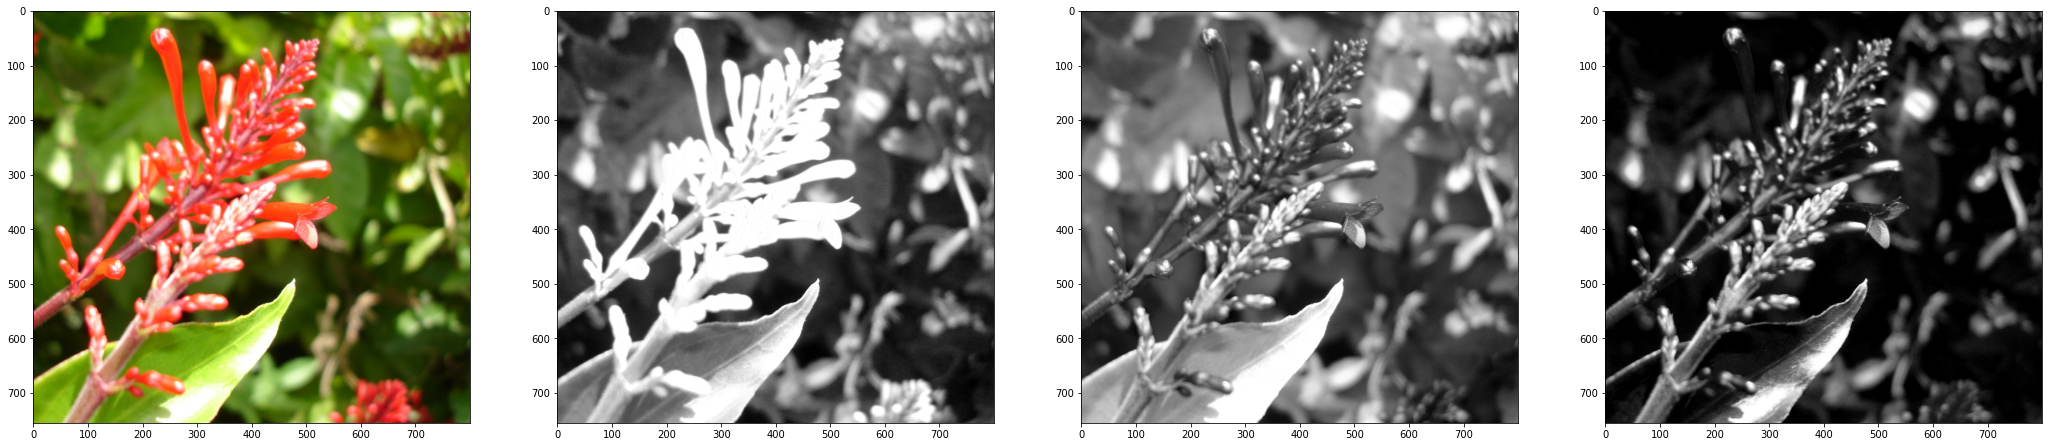

In [61]:
img_red = img[:,:,0]
img_green = img[:,:,1]
img_blue = img[:,:,2]
img_alpha = img[:,:,3]

plt.figure(figsize=[36, 36])
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(img_red, 'gray')
plt.subplot(1, 4, 3)
plt.imshow(img_green, 'gray')
plt.subplot(1, 4, 4)
plt.imshow(img_blue, 'gray')

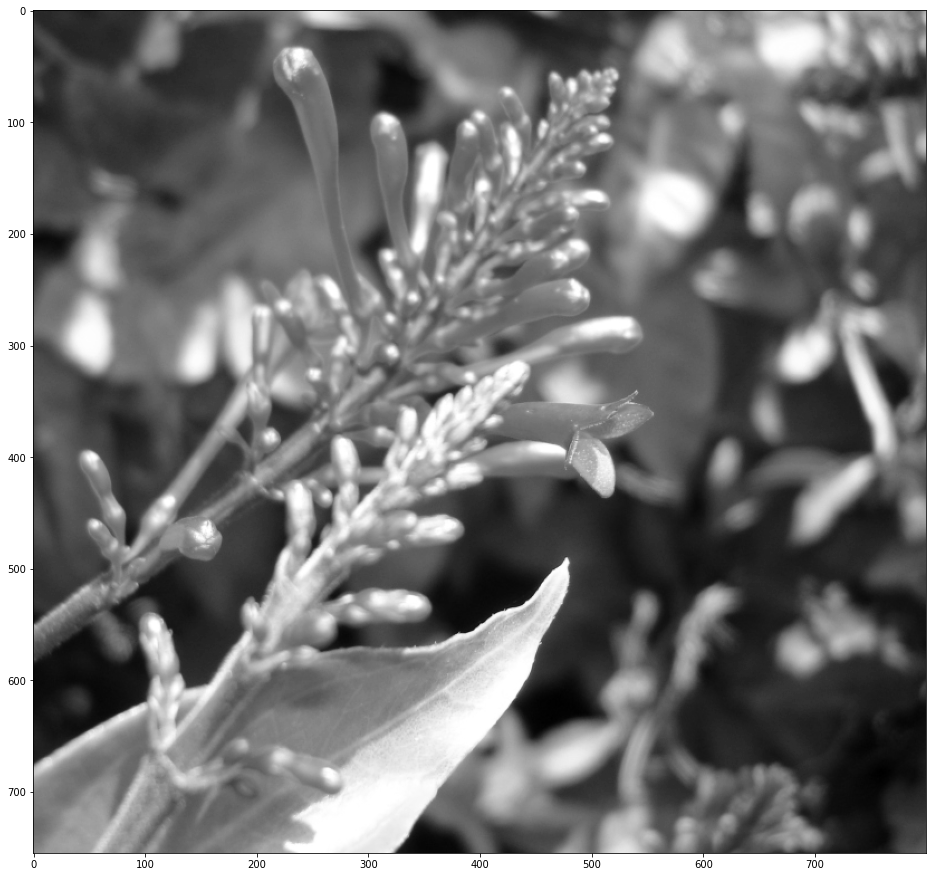

In [58]:
def rgb2gray(img):
  img_gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
  
  return img_gray

plt.figure(figsize=[16, 16])
plt.imshow(rgb2gray(img), 'gray')

In [62]:
img = plt.imread('Imgs/flower.tiff')
print(np.max(img), img.shape)
img = plt.imread('Imgs/flower.jpg')
print(np.max(img), img.shape)
img = plt.imread('Imgs/flower.png')
print(np.max(img), img.shape)

255 (755, 800, 4)
255 (755, 800, 3)
1.0 (755, 800, 3)
